In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("../data/data.csv")

In [3]:
# Crear nuevas variables que ayudarán al modelo
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']
df['diferencia_posesion'] = df['posesion_local (%)'] - df['posesion_visitante (%)']
df['eficiencia_tiros_local'] = df['goles_local'] / (df['tiros_arco_local'] + 1e-5)
df['eficiencia_tiros_visitante'] = df['goles_visitante'] / (df['tiros_arco_visitante'] + 1e-5)
df['local_es_cebollitas'] = (df['equipo_local'] == 'Cebollitas FC').astype(int)
df = pd.get_dummies(df, columns=['estadio'], drop_first=True)

In [4]:
# Elegimos las variables más informativas
features = [
    'posesion_local (%)', 'tiros_arco_local', 'diferencia_posesion',
    'eficiencia_tiros_local', 'eficiencia_tiros_visitante',
    'local_es_cebollitas'
] + [col for col in df.columns if col.startswith("estadio_")]

X = df[features]
y = df['diferencia_goles']

In [5]:
# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Entrenamos el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

In [7]:
# Métricas de evaluación
from sklearn.metrics import mean_absolute_error


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"📊 RMSE: {rmse_rf:.2f}")
print(f"📉 MAE: {mae_rf:.2f}")
print(f"📈 R²: {r2_rf:.2f}")

📊 RMSE: 1.02
📉 MAE: 0.73
📈 R²: 0.78


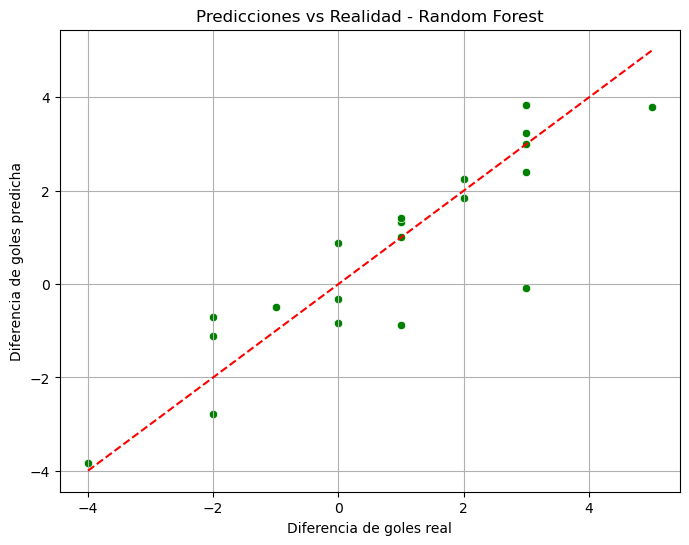

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Diferencia de goles real")
plt.ylabel("Diferencia de goles predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()